# Analysis Challenge Assignment 2
#### **Authors**: Yutong Shen, Jingfei Chen, Yiran Wang

**Tasks:**

- Build a classifier that can predict on or off-task behavior with the aca2_dataset_training.csv data.

- You can choose any or multiple features to include in your classifier.

- You can choose any or multiple algorithms to build you classifier.

- You may need to be strategic in terms of selecting variables, recoding some of the variables, or making reasonable transformations.

- Necessary descriptive analysis (e.g., mean, sd, correlation) is highly recommended.

- Be sure to report your model performance on aca2_dataset_validation.csv.

- Make sure the process (both data clean and analysis) is clearly documented, and your code is reproducible.

- Write one or two brief paragraphs on your interpretation of the result. What does the result mean to you?

**Following the task instructions, in ACA2, we defined our classifer as follows:**


*   **Features**:
* We performed feature selection using *Recursive Feature 
Elimination* and choose mutiple features to include in our Feature Set 1 - "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "SCHOOL", and "CODER".
* Other than using RFE, we also choose the features based on our own reasoning and multiple attempts to include in our Feature Set 2 - "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "Activity", and "Class".
*   **Algorithms**: Logistic Regression, Decision Tree


**1. Import Training Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read the training data
data = pd.read_csv("aca2_dataset_training.csv")
data

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


**2. Descriptive Analysis**

We will show some descriptive analysis in this part. Getting the desctiptive data as well as graphing the scatterplot will help us understand the data better from the very beginning.

In [ ]:
# get some descriptive data 
data['ONTASK'].value_counts()

Y    14938
N     7246
Name: ONTASK, dtype: int64

In [ ]:
data.describe()

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
count,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000
mean,28256.558556,2.056076,506965.948521,0.506446,9.621168,170.693608,2.383114,3.383114,1.534304,2.534304,973.525214,0.003159,774.587811
std,8030.006461,1.503220,283257.429497,0.499970,5.702232,105.788938,1.315163,1.315163,1.229399,1.229399,454.538354,0.010309,665.169774
min,14400.000000,0.000000,1123.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,387.000000,0.000000,0.000000
25%,21276.750000,1.000000,264220.000000,0.000000,5.000000,82.000000,1.000000,2.000000,1.000000,2.000000,721.200000,0.000839,252.000000
50%,28263.500000,2.000000,514301.000000,1.000000,9.000000,165.000000,2.000000,3.000000,1.000000,2.000000,876.250000,0.001513,586.500000
75%,35231.250000,4.000000,743450.000000,1.000000,14.000000,248.000000,3.000000,4.000000,2.000000,3.000000,1106.750000,0.003268,1121.000000
max,42130.000000,4.000000,999979.000000,1.000000,32.000000,511.000000,6.000000,7.000000,5.000000,6.000000,2735.000000,0.666667,3554.000000


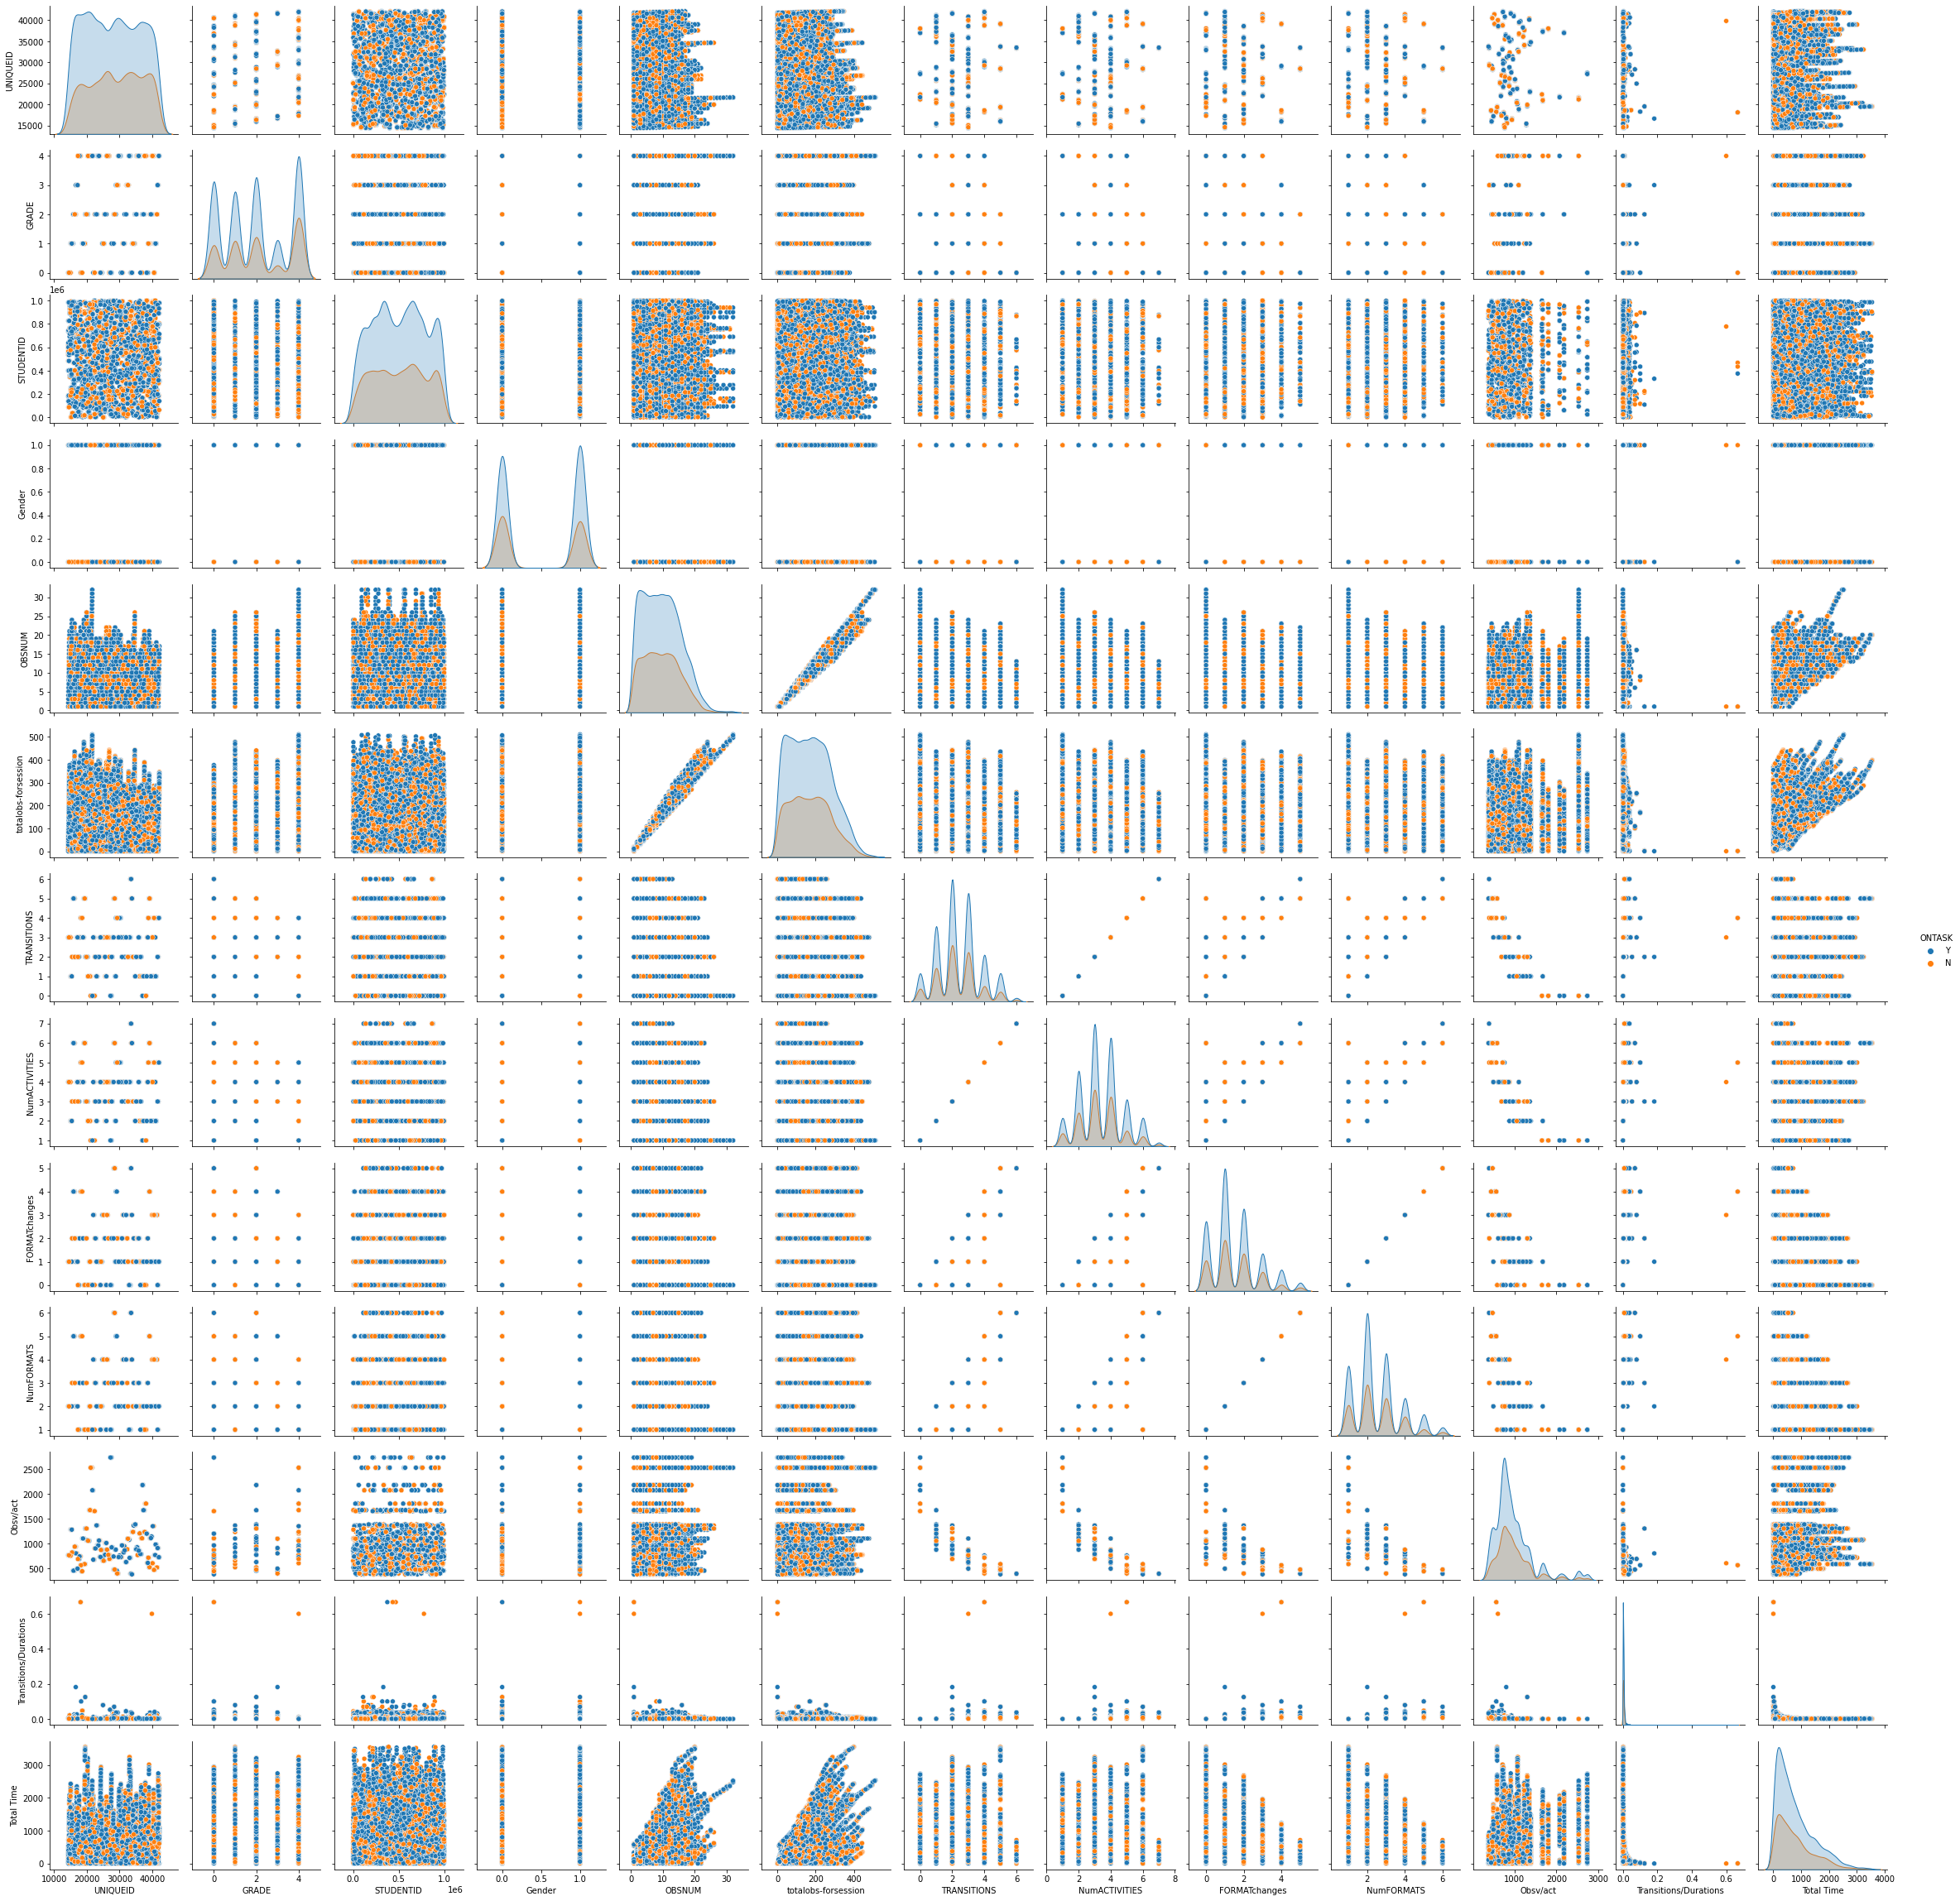

In [ ]:
# use seaborn package to get a scatter matrix
import seaborn as sns
sns.pairplot(data, hue = "ONTASK")

**3. Create Dummy Variables**

Based on the dataset, we need to create two dummy variables, which are ONTASK and CODER. 

In [ ]:
# create a dummy variable for ONTASK
dummyONTASK = pd.get_dummies(data['ONTASK'], prefix = 'ONTASK') 
data = pd.concat([data, dummyONTASK], axis=1)
data = data.drop(['ONTASK', 'ONTASK_N'], axis=1)
# data

In [ ]:
# create a dummy variable for CODER
dummyCODER = pd.get_dummies(data['CODER'], prefix = 'CODER') 
data = pd.concat([data, dummyCODER], axis=1)
data = data.drop(['CODER', 'CODER_Y'], axis=1)
# data

**4. Recode Some of the Variables**

We convert three varaibles into catergorical labels, which are "Activity", "SCHOOL", and "Class". We recode them as "Activity_cat", "SCHOOL_cat", and "Class_cat".

In [ ]:
# convert Activity to a category, then use those category values for label encoding
data['Activity'] = data['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Activity_cat"] = data["Activity"].cat.codes
data = data.drop(['Activity'], axis=1)

In [ ]:
# convert SCHOOL to a category, then use those category values for label encoding
data['SCHOOL'] = data['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["SCHOOL_cat"] = data["SCHOOL"].cat.codes
data = data.drop(['SCHOOL'], axis=1)

In [ ]:
# convert Class to a category, then use those category values for label encoding
data['Class'] = data['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Class_cat"] = data["Class"].cat.codes
data = data.drop(['Class'], axis=1)

**5. Feature Selection**



We choose to use feature selection to decide which variables should be included in our classifier. Among multiple algorithms, recursive feature elimination is our pick.

Rfe is effective in eliminating the features from the training dataset. It can quickly help us filter the variables that are most relevant in predicting the target variable. 


In [ ]:
# Feature Selection with Sci-Kit:
# RECURSIVE FEATURE ELIMINATION
# Feature ranking with recursive feature elimination 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = data.drop(['ONTASK_Y'], axis=1)   # drop the ONTASK_Y column
y = data['ONTASK_Y']
names=pd.DataFrame(X.columns)

# use logistic regression as the model
logit_reg = LogisticRegression(max_iter=2000)

# This is to select 8 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(logit_reg, 8, step=1) 
myvalues=rfe_mod.fit(X,y)  # to fit
myvalues.support_   # The mask of selected features
myvalues.ranking_   # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1

rankings=pd.DataFrame(myvalues.ranking_) # Make it into data frame
rankings


,0
0,8
1,1
2,9
3,1
4,4
5,5
6,1
7,1
8,1
9,1


Variables in the 2, 4, 7-10, 14, and 16 position ( a total of 8 variables) were selected for inclusion in a model. This is because we specified 8 variables as the preferred number of features. At this point, the feature names are not printed, only their position. 

In [ ]:
# Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

# Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

          Feature  Rank
1           GRADE     1
3          Gender     1
6     TRANSITIONS     1
7   NumACTIVITIES     1
8   FORMATchanges     1
9      NumFORMATS     1
13        CODER_Z     1
15     SCHOOL_cat     1


8

The code prints the variables ranked highest above the threshold specified.  Their rank is concatenated with the name of the feature for easier interpretation.

Thus, the 8 variables that will be included in our Feature Set 1 includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "SCHOOL_cat", and "CODER_Z".

As mentioned at the beginning, other than using RFE, we also choose Feature Set 2 variables based on our own reasoning. Feature Set 2 variables includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "Activity_cat", and "Class_cat".

**6. Import Validation Data**

In [ ]:
# read the validation data
testData = pd.read_csv("aca2_dataset_validation.csv")

**7. Prepare Validation Data the same way as Training Data**

In [ ]:
# create a dummy variable for ONTASK
dummyONTASK2 = pd.get_dummies(testData['ONTASK'], prefix = 'ONTASK') 
testData = pd.concat([testData, dummyONTASK2], axis=1)
testData = testData.drop(['ONTASK', 'ONTASK_N'], axis=1)

In [ ]:
# create a dummy variable for CODER
dummyCODER2 = pd.get_dummies(testData['CODER'], prefix = 'CODER') 
testData = pd.concat([testData, dummyCODER2], axis=1)
testData = testData.drop(['CODER', 'CODER_Y'], axis=1)

In [ ]:
# convert Activity to a category, then use those category values for label encoding
testData['Activity'] = testData['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Activity_cat"] = testData["Activity"].cat.codes
testData = testData.drop(['Activity'], axis=1)

In [ ]:
# convert SCHOOL to a category, then use those category values for label encoding
testData['SCHOOL'] = testData['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["SCHOOL_cat"] = testData["SCHOOL"].cat.codes
testData = testData.drop(['SCHOOL'], axis=1)

In [ ]:
# convert Class to a category, then use those category values for label encoding
testData['Class'] = testData['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Class_cat"] = testData["Class"].cat.codes
testData = testData.drop(['Class'], axis=1)

**8. Build our Classifier**

For classifer selection, we apply two approaches for comparison: logistic regression & decision tree.

- Logistic regression is the most common approach for classification and is easy to compute.
- Decision tree does not set strict requirements for data either normalization or missing data.

We will compare the accuracy of two approaches in the end.

**8.1. Using Logistic Regression**

In [ ]:
# create an array of X_train, and an arrary for the training labels y_train
X_train1 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_train2 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_train = y.values.reshape(-1, 1)

In [ ]:
# Then loading LogisticRegression() and calling for LogisticRegression.fit() 
LogitModel1 = LogisticRegression(max_iter=2000)
LogitModel2 = LogisticRegression(max_iter=2000)
LogitModel1.fit(X_train1, y_train)
LogitModel2.fit(X_train2, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# call for the intercept and coefficients of each parameter and we will have our logistic regression model
print(LogitModel1.intercept_)
print(LogitModel2.intercept_)

[0.53711626]
[0.37074765]


In [ ]:
print(LogitModel1.coef_)
print(LogitModel2.coef_)

[[-0.06594436  0.21193494 -0.22245707  0.31112433 -0.30177774  0.23180366
  -0.28806582 -0.08431776]]
[[-0.06780771  0.20101363 -0.14055238  0.22954067 -0.22229562  0.14779743
  -0.03125909  0.00205829]]


**8.1.1 Model Performance**

In [ ]:
# create an array of X_test, and an arrary for the training labels y_test
X_test1 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_test2 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_test = testData['ONTASK_Y'].values.reshape(-1, 1)

In [ ]:
# Feed the X_train in the testing dataset and obtain the predicted Ys
# Predicted value in sklearn logistic regression model
y_pred1 = LogitModel1.predict(X_test1)
y_pred2 = LogitModel2.predict(X_test2)

In [ ]:
# Compare the predicted Ys with what is actually in the testing dataset and obtain the confusion matrix.
from sklearn.metrics import confusion_matrix

# sklearn logistic regression model confusion matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[   0 1849]
 [   0 3698]]
[[   0 1849]
 [   0 3698]]


In [ ]:
# Obtaining accuracy scores
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_test, y_pred1)
print("The accuracy for logistic regression 1 in sklearn is", ac_logit1*100, "%")
ac_logit2 = accuracy_score(y_test, y_pred2)
print("The accuracy for logistic regression 2 in sklearn is", ac_logit2*100, "%")

The accuracy for logistic regression 1 in sklearn is 66.66666666666666 %
The accuracy for logistic regression 2 in sklearn is 66.66666666666666 %


In [ ]:
from sklearn import metrics
import numpy as np

print(metrics.classification_report(y_test, y_pred1, zero_division=0))
print(metrics.classification_report(y_test, y_pred2, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1849
           1       0.67      1.00      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.33      0.50      0.40      5547
weighted avg       0.44      0.67      0.53      5547

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1849
           1       0.67      1.00      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.33      0.50      0.40      5547
weighted avg       0.44      0.67      0.53      5547



**8.2. Using Decision Tree Classifier**

In [ ]:
# create an array of X_train, and an arrary for the training labels y_train
X_train1 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_train2 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_train = data['ONTASK_Y'].values.reshape(-1, 1)

# create an array of X_test, and an arrary for the training labels y_test
X_test1 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_test2 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_test = testData['ONTASK_Y'].values.reshape(-1, 1)

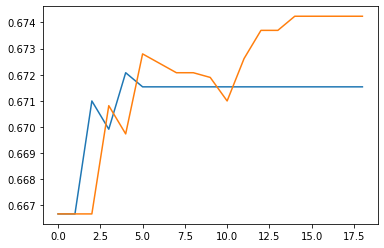

In [ ]:
# plot tree model score based on different max_depth
acc1=[]
acc2=[]
for i in range(1,20):
  treeModel = DecisionTreeClassifier(max_depth=i).fit(X_train1,y_train)
  acc1.append(treeModel.score(X_test1,y_test))
  treeModel = DecisionTreeClassifier(max_depth=i).fit(X_train2,y_train)
  acc2.append(treeModel.score(X_test2,y_test))

plt.plot(acc1)
plt.plot(acc2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
treeModel1 = DecisionTreeClassifier(max_depth=5)
treeModel2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
treeModel1 = treeModel1.fit(X_train1,y_train)
treeModel2 = treeModel2.fit(X_train2,y_train)

#Predict the response for test dataset
y_pred1 = treeModel1.predict(X_test1)
y_pred2 = treeModel2.predict(X_test2)

**8.2.1 Model Performance**

In [ ]:
# sklearn logistic regression model confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[ 147 1702]
 [ 117 3581]]
[[ 234 1615]
 [ 192 3506]]


In [ ]:
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("The accuracy for decision tree 1 is:",metrics.accuracy_score(y_test, y_pred1)*100, "%")
print("The accuracy for decision tree 2 is:",metrics.accuracy_score(y_test, y_pred2)*100, "%")

The accuracy for decision tree 1 is: 67.20749954930592 %
The accuracy for decision tree 2 is: 67.42383270236164 %


In [ ]:
from sklearn import metrics
import numpy as np

print(metrics.classification_report(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.56      0.08      0.14      1849
           1       0.68      0.97      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.62      0.52      0.47      5547
weighted avg       0.64      0.67      0.58      5547

              precision    recall  f1-score   support

           0       0.55      0.13      0.21      1849
           1       0.68      0.95      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.62      0.54      0.50      5547
weighted avg       0.64      0.67      0.60      5547



**9. Interpretation**

Feature Set 1 variables includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "SCHOOL_cat", and "CODER_Z".

Feature Set 2 variables includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "Activity_cat", and "Class_cat".

The difference betweeen Feature Set 1 & 2 are in School + Coder & Activity + Class.

The RFE suggested that school and coder would give us a more accurate prediction on whether the student is ontask or not. 'School' as a general variable could have lead to a difference in the result. 'Coder' as the person who coded on/off task behavior could have bring in personal bias when recording the behavior.

However, we believe that 'Activity' as the different format of activities could lead to engagement difference and change whether a student is on/off task. 'Class' would be another variable that should be taken into consideration because the class environment of having more children on/off task could impact a child's behavior. These variables could help researchers to see what they can do to imporve the children's behavior such as choosing more engaging activities to conduct or improve the overall class environment.


In our analysis above, we have taken Feature Set 1 variables and Feature Set 2 variables to conduct both Logistic regression and decision tree.
The accuracy rate reflects how each Feature Set using the classifiers can predict on or off-task behavior accurately with the training dataset.

When taking Feature Set 1 variables, we got 66.66% accuracy using logistic regression and 67.21% accuracy when using decision tree.
When taking Feature Set 2 variables, we got 66.66% accuracy using logistic regression and 67.42% accuracy when using decision tree.

Based on the classification report, we can see that decision tree performs better in predicting on or off-task behavior using both Feature Set variables.
Based on the above, we will choose to use Feature Set 2 variables and the decision tree classifier because it performs slightly better than the others.